In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, SpatialDropout1D
from tensorflow.keras import utils, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2024-11-30 11:03:01.898264: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-30 11:03:01.927451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Максимальное количество слов
num_words = 10000
# Максимальная длина новости
max_news_len = 30
# Количество классов новостей
nb_classes = 4

In [3]:
train_set = pd.read_csv('train.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])
news = train_set['text']

In [4]:
y_train = utils.to_categorical(train_set['class'] - 1, nb_classes)

In [5]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(news)
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

In [6]:
sequences = tokenizer.texts_to_sequences(news)  

In [7]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [8]:
# Свертночная нейросеть

In [9]:
model_cnn = Sequential([
    Input(shape=(max_news_len,)),
    Embedding(num_words, 32),  
    Conv1D(250, 5, padding='valid', activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 30, 32)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 26, 250)        │        40,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 250)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,526 (1.44 MB)

 Trainable params: 378,526 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6883 - loss: 0.7477 - val_accuracy: 0.8837 - val_loss: 0.3216
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9131 - loss: 0.2773 - val_accuracy: 0.8885 - val_loss: 0.3115
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9285 - loss: 0.2236 - val_accuracy: 0.8875 - val_loss: 0.3150
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9427 - loss: 0.1788 - val_accuracy: 0.8826 - val_loss: 0.3462
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9582 - loss: 0.1286 - val_accuracy: 0.8778 - val_loss: 0.4144


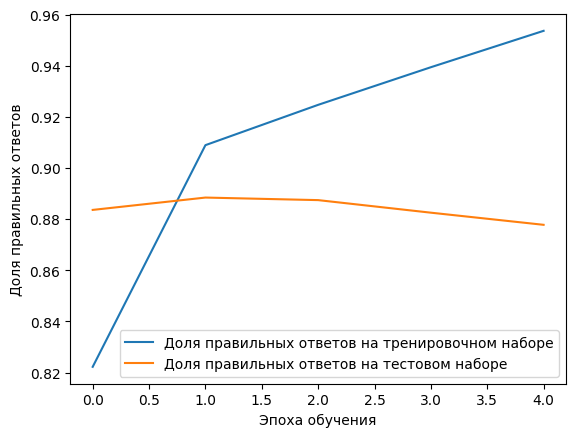

In [12]:
plt.plot(history_cnn.history['accuracy'],
          label='Доля правильных ответов на тренировочном наборе')  
plt.plot(history_cnn.history['val_accuracy'],
          label='Доля правильных ответов на тестовом наборе')      
plt.xlabel('Эпоха обучения')                                      
plt.ylabel('Доля правильных ответов')                           
plt.legend()                                                     
plt.show()                                                        

In [13]:
# LSTM

In [14]:
model_lstm = Sequential([
    Input(shape=(max_news_len,)),  
    Embedding(num_words, 32),     
    SpatialDropout1D(0.2),
    LSTM(16, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 30, 32)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 30, 32)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,276 (1.24 MB)

 Trainable params: 324,276 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6302 - loss: 0.8666 - val_accuracy: 0.8748 - val_loss: 0.3667
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8820 - loss: 0.3978 - val_accuracy: 0.8842 - val_loss: 0.3416
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8969 - loss: 0.3446 - val_accuracy: 0.8842 - val_loss: 0.3336
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9101 - loss: 0.3066 - val_accuracy: 0.8898 - val_loss: 0.3280
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9157 - loss: 0.2860 - val_accuracy: 0.8865 - val_loss: 0.3344


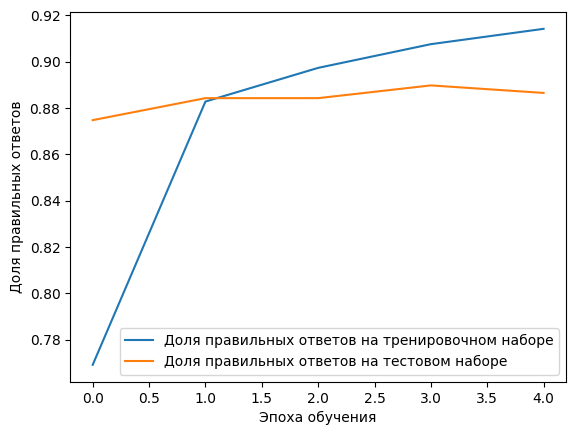

In [17]:
plt.plot(history_lstm.history['accuracy'],
          label='Доля правильных ответов на тренировочном наборе') 
plt.plot(history_lstm.history['val_accuracy'],
          label='Доля правильных ответов на тестовом наборе')       
plt.xlabel('Эпоха обучения')                                      
plt.ylabel('Доля правильных ответов')                           
plt.legend()                                                     
plt.show()                                                      

In [18]:
# GRU

In [19]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, GRU, Dense, Dropout

model_gru = Sequential([
    Input(shape=(max_news_len,)),
    Embedding(num_words, 32),     
    SpatialDropout1D(0.2),
    GRU(16, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model_gru.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 30, 32)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 30, 32)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,540 (1.23 MB)

 Trainable params: 323,540 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5619 - loss: 0.9453 - val_accuracy: 0.7548 - val_loss: 0.7080
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8667 - loss: 0.4206 - val_accuracy: 0.7552 - val_loss: 0.6959
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8926 - loss: 0.3526 - val_accuracy: 0.7599 - val_loss: 0.6779
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9027 - loss: 0.3213 - val_accuracy: 0.7538 - val_loss: 0.6818
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9096 - loss: 0.2942 - val_accuracy: 0.7498 - val_loss: 0.6838


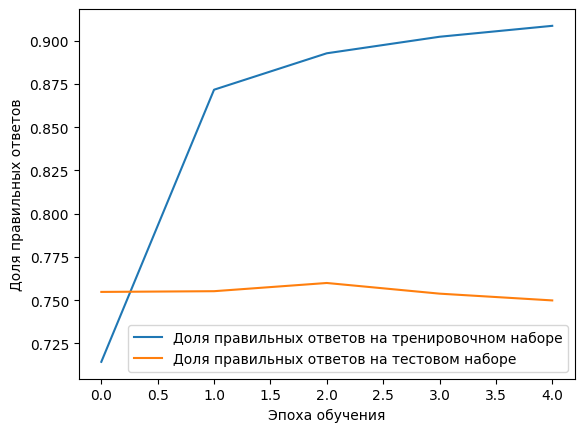

In [22]:
plt.plot(history_gru.history['accuracy'],
          label='Доля правильных ответов на тренировочном наборе') 
plt.plot(history_gru.history['val_accuracy'],
          label='Доля правильных ответов на тестовом наборе')    
plt.xlabel('Эпоха обучения')                                   
plt.ylabel('Доля правильных ответов')                           
plt.legend()                                                     
plt.show()                                                       

In [23]:
# Набор данных для тестирования

In [24]:
test_set = pd.read_csv('test.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

In [25]:
test_sequences = tokenizer.texts_to_sequences(test_set['text'])
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

y_test = utils.to_categorical(test_set['class'] - 1, nb_classes) # Correct answers

In [26]:
# Оценка качества работы нейросети на тестовом наборе данных

In [27]:
_, cnn_acc = model_cnn.evaluate(x_test, y_test, verbose=1)
_, lstm_acc = model_lstm.evaluate(x_test, y_test, verbose=1)
_, gru_acc = model_gru.evaluate(x_test, y_test, verbose=1)

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8895 - loss: 0.3932
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8803 - loss: 0.3681
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7466 - loss: 0.6917


In [28]:
print(f"Точность сверточной нейросети: {round(cnn_acc, 4)}")        
print(f"Точность LSTM сети: {round(lstm_acc, 4)}")              
print(f"Точность GRU сети: {round(gru_acc, 4)}\n")             

best = max(gru_acc, max(cnn_acc, lstm_acc))                 

best_model = ''                                                

if best == gru_acc:                                             
    best_model = "GRU Network"
elif best == lstm_acc:                                          
    best_model = "LSTM Network"
else:                                                           
    best_model = "1D Convolutional"

print(f"Лучшая модель: {best_model} с точностью {best}")      

Точность сверточной нейросети: 0.8904
Точность LSTM сети: 0.8892
Точность GRU сети: 0.7558

Лучшая модель: 1D Convolutional с точностью 0.8903947472572327
